In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/My Drive/EVA5/Week8/")

In [16]:
import time
import torch
!pip install torchsummary
from data.data_loaders.base_data_loader import BaseDataLoader
from data.base_data_utils import get_data_loaders
from utils.misc_utils import get_device_type
from models.networks.resnet import ResNet18
from configs import basic_config
from utils.visualization_utils import plot_multigraph, plot_misclassified_images
from models.model_builder import build_model
from utils import logger_utils
from orchestrators.base_orchestrator import start_training
from orchestrators.base_orchestrator import display_classwise_accuracy
from torchsummary import summary

In [4]:
logger = logger_utils.get_logger(__name__)

In [5]:
train_loader, test_loader = get_data_loaders(dataset_name='cifar10')


**** Started Loading data ****

Files already downloaded and verified
CUDA Available? True
Files already downloaded and verified
CUDA Available? True
CUDA Available? True

**** Ended Loading data ****



In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

 frog plane   cat horse


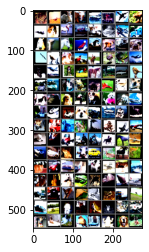

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
def print_summary(network,title):
  print(title)
  summary(network,input_size=(3,32,32))

In [9]:
device = get_device_type()
model = ResNet18().to(device)
print_summary(model,'Network summary')

Network summary
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14   

/content/drive/My Drive/EVA5/Week8/models/networks/resnet.py:104: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


In [10]:
EPOCHS = basic_config.EPOCHS
device = get_device_type()
results = {}

models_dict = {'resnet18': {'model': model}
          }

lst_plottingJobs_val_acc = []
lst_plottingLegends_val_acc = []
lst_plottingJobs_loss = []
lst_plottingLegends_loss = []

## Training

results = start_training(EPOCHS, device, train_loader, test_loader, **models_dict)

  0%|          | 0/391 [00:00<?, ?it/s]


**** Started training ****


Model: resnet18

0 0
[EPOCH:0]


/content/drive/My Drive/EVA5/Week8/models/networks/resnet.py:104: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=1.7007650136947632 Batch_id=390 Current_train_batch_accuracy=30.34: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 1.6156, Accuracy: 20111/50000 (40.22%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.6002, Accuracy: 4135/10000 (41.35%)

best_test_accuracy 41.35
[EPOCH:1]


Loss=1.416117548942566 Batch_id=390 Current_train_batch_accuracy=46.00: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]



Train set: Average loss: 1.3652, Accuracy: 25046/50000 (50.09%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3638, Accuracy: 5028/10000 (50.28%)

best_test_accuracy 50.28
[EPOCH:2]


Loss=0.9422194361686707 Batch_id=390 Current_train_batch_accuracy=56.30: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]



Train set: Average loss: 1.1090, Accuracy: 29671/50000 (59.34%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1225, Accuracy: 5901/10000 (59.01%)

best_test_accuracy 59.01
[EPOCH:3]


Loss=0.7545135021209717 Batch_id=390 Current_train_batch_accuracy=63.45: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]



Train set: Average loss: 0.9845, Accuracy: 32634/50000 (65.27%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9916, Accuracy: 6566/10000 (65.66%)

best_test_accuracy 65.66
[EPOCH:4]


Loss=0.9619714021682739 Batch_id=390 Current_train_batch_accuracy=67.97: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.9340, Accuracy: 33381/50000 (66.76%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9242, Accuracy: 6799/10000 (67.99%)

best_test_accuracy 67.99
[EPOCH:5]


Loss=0.7752406001091003 Batch_id=390 Current_train_batch_accuracy=71.33: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.7779, Accuracy: 36099/50000 (72.20%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8097, Accuracy: 7218/10000 (72.18%)

best_test_accuracy 72.18
[EPOCH:6]


Loss=0.5863489508628845 Batch_id=390 Current_train_batch_accuracy=74.18: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.7562, Accuracy: 36950/50000 (73.90%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7635, Accuracy: 7448/10000 (74.48%)

best_test_accuracy 74.48
[EPOCH:7]


Loss=0.49678269028663635 Batch_id=390 Current_train_batch_accuracy=76.65: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.7266, Accuracy: 37869/50000 (75.74%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7016, Accuracy: 7657/10000 (76.57%)

best_test_accuracy 76.57
[EPOCH:8]


Loss=0.5906099677085876 Batch_id=390 Current_train_batch_accuracy=79.13: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.5780, Accuracy: 39839/50000 (79.68%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6118, Accuracy: 7959/10000 (79.59%)

best_test_accuracy 79.59
[EPOCH:9]


Loss=0.675146758556366 Batch_id=390 Current_train_batch_accuracy=80.77: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]



Train set: Average loss: 0.5094, Accuracy: 41087/50000 (82.17%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5546, Accuracy: 8151/10000 (81.51%)

best_test_accuracy 81.51
[EPOCH:10]


Loss=0.4192051887512207 Batch_id=390 Current_train_batch_accuracy=82.61: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.4438, Accuracy: 42091/50000 (84.18%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4898, Accuracy: 8328/10000 (83.28%)

best_test_accuracy 83.28
[EPOCH:11]


Loss=0.5353400111198425 Batch_id=390 Current_train_batch_accuracy=83.61: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.4791, Accuracy: 41596/50000 (83.19%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5206, Accuracy: 8197/10000 (81.97%)

best_test_accuracy 83.28
[EPOCH:12]


Loss=0.40032607316970825 Batch_id=390 Current_train_batch_accuracy=85.08: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.4106, Accuracy: 42693/50000 (85.39%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4528, Accuracy: 8451/10000 (84.51%)

best_test_accuracy 84.51
[EPOCH:13]


Loss=0.3339293599128723 Batch_id=390 Current_train_batch_accuracy=86.03: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.3807, Accuracy: 43399/50000 (86.80%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4332, Accuracy: 8537/10000 (85.37%)

best_test_accuracy 85.37
[EPOCH:14]


Loss=0.3543328642845154 Batch_id=390 Current_train_batch_accuracy=86.74: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.3908, Accuracy: 43279/50000 (86.56%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4913, Accuracy: 8428/10000 (84.28%)

best_test_accuracy 85.37
[EPOCH:15]


Loss=0.34310847520828247 Batch_id=390 Current_train_batch_accuracy=87.58: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.3740, Accuracy: 43371/50000 (86.74%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4780, Accuracy: 8421/10000 (84.21%)

best_test_accuracy 85.37
[EPOCH:16]


Loss=0.336880624294281 Batch_id=390 Current_train_batch_accuracy=88.36: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.3109, Accuracy: 44502/50000 (89.00%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3997, Accuracy: 8667/10000 (86.67%)

best_test_accuracy 86.67
[EPOCH:17]


Loss=0.29474109411239624 Batch_id=390 Current_train_batch_accuracy=89.20: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.3058, Accuracy: 44584/50000 (89.17%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4120, Accuracy: 8678/10000 (86.78%)

best_test_accuracy 86.78
[EPOCH:18]


Loss=0.3545120358467102 Batch_id=390 Current_train_batch_accuracy=89.44: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.2929, Accuracy: 44834/50000 (89.67%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4210, Accuracy: 8609/10000 (86.09%)

best_test_accuracy 86.78
[EPOCH:19]


Loss=0.2553762197494507 Batch_id=390 Current_train_batch_accuracy=90.25: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 0.2525, Accuracy: 45558/50000 (91.12%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3781, Accuracy: 8820/10000 (88.20%)

best_test_accuracy 88.2
[EPOCH:20]


Loss=0.3859841227531433 Batch_id=390 Current_train_batch_accuracy=90.96: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]



Train set: Average loss: 0.2363, Accuracy: 45837/50000 (91.67%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3609, Accuracy: 8861/10000 (88.61%)

best_test_accuracy 88.61
[EPOCH:21]


Loss=0.1384708285331726 Batch_id=390 Current_train_batch_accuracy=91.23: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.2547, Accuracy: 45526/50000 (91.05%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3848, Accuracy: 8796/10000 (87.96%)

best_test_accuracy 88.61
[EPOCH:22]


Loss=0.2779279053211212 Batch_id=390 Current_train_batch_accuracy=91.66: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]



Train set: Average loss: 0.2201, Accuracy: 46103/50000 (92.21%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3722, Accuracy: 8838/10000 (88.38%)

best_test_accuracy 88.61
[EPOCH:23]


Loss=0.1314488798379898 Batch_id=390 Current_train_batch_accuracy=92.48: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 0.1834, Accuracy: 46779/50000 (93.56%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3436, Accuracy: 8888/10000 (88.88%)

best_test_accuracy 88.88
[EPOCH:24]


Loss=0.3206624984741211 Batch_id=390 Current_train_batch_accuracy=92.54: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.1755, Accuracy: 46891/50000 (93.78%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3480, Accuracy: 8888/10000 (88.88%)

best_test_accuracy 88.88
[EPOCH:25]


Loss=0.2552635073661804 Batch_id=390 Current_train_batch_accuracy=92.83: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]



Train set: Average loss: 0.1945, Accuracy: 46573/50000 (93.15%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3820, Accuracy: 8889/10000 (88.89%)

best_test_accuracy 88.89
[EPOCH:26]


Loss=0.2357337921857834 Batch_id=390 Current_train_batch_accuracy=93.32: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.1765, Accuracy: 46791/50000 (93.58%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3756, Accuracy: 8860/10000 (88.60%)

best_test_accuracy 88.89
[EPOCH:27]


Loss=0.2136877030134201 Batch_id=390 Current_train_batch_accuracy=93.66: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.1524, Accuracy: 47309/50000 (94.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3448, Accuracy: 8990/10000 (89.90%)

best_test_accuracy 89.9
[EPOCH:28]


Loss=0.2579754889011383 Batch_id=390 Current_train_batch_accuracy=94.04: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.1420, Accuracy: 47400/50000 (94.80%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3371, Accuracy: 8972/10000 (89.72%)

best_test_accuracy 89.9
[EPOCH:29]


Loss=0.12509718537330627 Batch_id=390 Current_train_batch_accuracy=94.17: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.1595, Accuracy: 47120/50000 (94.24%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3746, Accuracy: 8863/10000 (88.63%)

best_test_accuracy 89.9
[EPOCH:30]


Loss=0.17723718285560608 Batch_id=390 Current_train_batch_accuracy=94.49: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.1434, Accuracy: 47416/50000 (94.83%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3590, Accuracy: 8971/10000 (89.71%)

best_test_accuracy 89.9
[EPOCH:31]


Loss=0.0914631336927414 Batch_id=390 Current_train_batch_accuracy=94.84: 100%|██████████| 391/391 [00:30<00:00, 12.99it/s]



Train set: Average loss: 0.1342, Accuracy: 47602/50000 (95.20%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3689, Accuracy: 8964/10000 (89.64%)

best_test_accuracy 89.9
[EPOCH:32]


Loss=0.20120206475257874 Batch_id=390 Current_train_batch_accuracy=94.95: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]



Train set: Average loss: 0.1494, Accuracy: 47274/50000 (94.55%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4039, Accuracy: 8933/10000 (89.33%)

best_test_accuracy 89.9
[EPOCH:33]


Loss=0.16229981184005737 Batch_id=390 Current_train_batch_accuracy=95.22: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]



Train set: Average loss: 0.1158, Accuracy: 47973/50000 (95.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3533, Accuracy: 9012/10000 (90.12%)

best_test_accuracy 90.12
[EPOCH:34]


Loss=0.1648256778717041 Batch_id=390 Current_train_batch_accuracy=95.58: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]



Train set: Average loss: 0.1100, Accuracy: 48017/50000 (96.03%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3640, Accuracy: 9009/10000 (90.09%)

best_test_accuracy 90.12
[EPOCH:35]


Loss=0.1421712338924408 Batch_id=390 Current_train_batch_accuracy=95.78: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]



Train set: Average loss: 0.1149, Accuracy: 47946/50000 (95.89%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3924, Accuracy: 8980/10000 (89.80%)

best_test_accuracy 90.12
[EPOCH:36]


Loss=0.05727893114089966 Batch_id=390 Current_train_batch_accuracy=95.90: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]



Train set: Average loss: 0.0979, Accuracy: 48335/50000 (96.67%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3608, Accuracy: 9049/10000 (90.49%)

best_test_accuracy 90.49
[EPOCH:37]


Loss=0.12602683901786804 Batch_id=390 Current_train_batch_accuracy=96.13: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0930, Accuracy: 48356/50000 (96.71%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3576, Accuracy: 9040/10000 (90.40%)

best_test_accuracy 90.49
[EPOCH:38]


Loss=0.1292220652103424 Batch_id=390 Current_train_batch_accuracy=96.34: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0916, Accuracy: 48393/50000 (96.79%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3666, Accuracy: 9044/10000 (90.44%)

best_test_accuracy 90.49
[EPOCH:39]


Loss=0.10778772830963135 Batch_id=390 Current_train_batch_accuracy=96.49: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0934, Accuracy: 48338/50000 (96.68%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3818, Accuracy: 9026/10000 (90.26%)

best_test_accuracy 90.49
[EPOCH:40]


Loss=0.07319872081279755 Batch_id=390 Current_train_batch_accuracy=96.54: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0836, Accuracy: 48474/50000 (96.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3656, Accuracy: 9059/10000 (90.59%)

best_test_accuracy 90.59
[EPOCH:41]


Loss=0.10081182420253754 Batch_id=390 Current_train_batch_accuracy=96.88: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0806, Accuracy: 48537/50000 (97.07%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3947, Accuracy: 9050/10000 (90.50%)

best_test_accuracy 90.59
[EPOCH:42]


Loss=0.07769770175218582 Batch_id=390 Current_train_batch_accuracy=96.74: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0727, Accuracy: 48682/50000 (97.36%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3473, Accuracy: 9092/10000 (90.92%)

best_test_accuracy 90.92
[EPOCH:43]


Loss=0.047292351722717285 Batch_id=390 Current_train_batch_accuracy=97.24: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]



Train set: Average loss: 0.0640, Accuracy: 48865/50000 (97.73%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4024, Accuracy: 9053/10000 (90.53%)

best_test_accuracy 90.92
[EPOCH:44]


Loss=0.08665601909160614 Batch_id=390 Current_train_batch_accuracy=97.19: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0577, Accuracy: 49041/50000 (98.08%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3865, Accuracy: 9070/10000 (90.70%)

best_test_accuracy 90.92
[EPOCH:45]


Loss=0.08180468529462814 Batch_id=390 Current_train_batch_accuracy=97.35: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0651, Accuracy: 48880/50000 (97.76%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3872, Accuracy: 9090/10000 (90.90%)

best_test_accuracy 90.92
[EPOCH:46]


Loss=0.02679750882089138 Batch_id=390 Current_train_batch_accuracy=97.52: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0623, Accuracy: 48913/50000 (97.83%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3986, Accuracy: 9039/10000 (90.39%)

best_test_accuracy 90.92
[EPOCH:47]


Loss=0.1127806305885315 Batch_id=390 Current_train_batch_accuracy=97.53: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 0.0666, Accuracy: 48820/50000 (97.64%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4256, Accuracy: 9008/10000 (90.08%)

best_test_accuracy 90.92
[EPOCH:48]


Loss=0.06869065016508102 Batch_id=390 Current_train_batch_accuracy=97.70: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0621, Accuracy: 48930/50000 (97.86%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4165, Accuracy: 9074/10000 (90.74%)

best_test_accuracy 90.92
[EPOCH:49]


Loss=0.09120858460664749 Batch_id=390 Current_train_batch_accuracy=97.67: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0530, Accuracy: 49095/50000 (98.19%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3949, Accuracy: 9094/10000 (90.94%)

best_test_accuracy 90.94
[EPOCH:50]


Loss=0.13452516496181488 Batch_id=390 Current_train_batch_accuracy=97.91: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]



Train set: Average loss: 0.0544, Accuracy: 49046/50000 (98.09%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4036, Accuracy: 9091/10000 (90.91%)

best_test_accuracy 90.94
[EPOCH:51]


Loss=0.02346724271774292 Batch_id=390 Current_train_batch_accuracy=97.91: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0597, Accuracy: 48969/50000 (97.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4431, Accuracy: 9018/10000 (90.18%)

best_test_accuracy 90.94
[EPOCH:52]


Loss=0.04296468570828438 Batch_id=390 Current_train_batch_accuracy=97.93: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0443, Accuracy: 49196/50000 (98.39%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3895, Accuracy: 9098/10000 (90.98%)

best_test_accuracy 90.98
[EPOCH:53]


Loss=0.0870683342218399 Batch_id=390 Current_train_batch_accuracy=98.01: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]



Train set: Average loss: 0.0511, Accuracy: 49085/50000 (98.17%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4213, Accuracy: 9050/10000 (90.50%)

best_test_accuracy 90.98
[EPOCH:54]


Loss=0.033191367983818054 Batch_id=390 Current_train_batch_accuracy=98.24: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0448, Accuracy: 49196/50000 (98.39%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4276, Accuracy: 9073/10000 (90.73%)

best_test_accuracy 90.98
[EPOCH:55]


Loss=0.08075778186321259 Batch_id=390 Current_train_batch_accuracy=98.14: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0615, Accuracy: 48913/50000 (97.83%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4427, Accuracy: 9055/10000 (90.55%)

best_test_accuracy 90.98
[EPOCH:56]


Loss=0.0677582398056984 Batch_id=390 Current_train_batch_accuracy=98.26: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0550, Accuracy: 49002/50000 (98.00%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4297, Accuracy: 9084/10000 (90.84%)

best_test_accuracy 90.98
[EPOCH:57]


Loss=0.01843813993036747 Batch_id=390 Current_train_batch_accuracy=98.46: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0489, Accuracy: 49137/50000 (98.27%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4218, Accuracy: 9118/10000 (91.18%)

best_test_accuracy 91.18
[EPOCH:58]


Loss=0.028902094811201096 Batch_id=390 Current_train_batch_accuracy=98.29: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0341, Accuracy: 49442/50000 (98.88%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4199, Accuracy: 9133/10000 (91.33%)

best_test_accuracy 91.33
[EPOCH:59]


Loss=0.059107471257448196 Batch_id=390 Current_train_batch_accuracy=98.57: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0400, Accuracy: 49312/50000 (98.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4275, Accuracy: 9122/10000 (91.22%)

best_test_accuracy 91.33
[EPOCH:60]


Loss=0.02259426936507225 Batch_id=390 Current_train_batch_accuracy=98.44: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]



Train set: Average loss: 0.0347, Accuracy: 49402/50000 (98.80%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4209, Accuracy: 9129/10000 (91.29%)

best_test_accuracy 91.33
[EPOCH:61]


Loss=0.023000255227088928 Batch_id=390 Current_train_batch_accuracy=98.53: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0379, Accuracy: 49332/50000 (98.66%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4258, Accuracy: 9089/10000 (90.89%)

best_test_accuracy 91.33
[EPOCH:62]


Loss=0.0095642926171422 Batch_id=390 Current_train_batch_accuracy=98.57: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 0.0421, Accuracy: 49279/50000 (98.56%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4163, Accuracy: 9089/10000 (90.89%)

best_test_accuracy 91.33
[EPOCH:63]


Loss=0.008236026391386986 Batch_id=390 Current_train_batch_accuracy=98.69: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0320, Accuracy: 49445/50000 (98.89%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4516, Accuracy: 9121/10000 (91.21%)

best_test_accuracy 91.33
[EPOCH:64]


Loss=0.05278988555073738 Batch_id=390 Current_train_batch_accuracy=98.50: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]



Train set: Average loss: 0.0339, Accuracy: 49406/50000 (98.81%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4358, Accuracy: 9125/10000 (91.25%)

best_test_accuracy 91.33
[EPOCH:65]


Loss=0.02477903664112091 Batch_id=390 Current_train_batch_accuracy=98.65: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0354, Accuracy: 49383/50000 (98.77%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4415, Accuracy: 9137/10000 (91.37%)

best_test_accuracy 91.37
[EPOCH:66]


Loss=0.09942136704921722 Batch_id=390 Current_train_batch_accuracy=98.76: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0377, Accuracy: 49320/50000 (98.64%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4774, Accuracy: 9063/10000 (90.63%)

best_test_accuracy 91.37
[EPOCH:67]


Loss=0.11915571987628937 Batch_id=390 Current_train_batch_accuracy=98.70: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]



Train set: Average loss: 0.0327, Accuracy: 49425/50000 (98.85%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4431, Accuracy: 9116/10000 (91.16%)

best_test_accuracy 91.37
[EPOCH:68]


Loss=0.05186910554766655 Batch_id=390 Current_train_batch_accuracy=98.78: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0327, Accuracy: 49420/50000 (98.84%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4415, Accuracy: 9146/10000 (91.46%)

best_test_accuracy 91.46
[EPOCH:69]


Loss=0.03352666646242142 Batch_id=390 Current_train_batch_accuracy=98.81: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]



Train set: Average loss: 0.0258, Accuracy: 49546/50000 (99.09%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4421, Accuracy: 9145/10000 (91.45%)

best_test_accuracy 91.46
[EPOCH:70]


Loss=0.003134066704660654 Batch_id=390 Current_train_batch_accuracy=98.85: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0321, Accuracy: 49425/50000 (98.85%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4452, Accuracy: 9146/10000 (91.46%)

best_test_accuracy 91.46
[EPOCH:71]


Loss=0.13763116300106049 Batch_id=390 Current_train_batch_accuracy=98.83: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0223, Accuracy: 49606/50000 (99.21%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4216, Accuracy: 9171/10000 (91.71%)

best_test_accuracy 91.71
[EPOCH:72]


Loss=0.0016022867057472467 Batch_id=390 Current_train_batch_accuracy=98.91: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 0.0279, Accuracy: 49518/50000 (99.04%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4330, Accuracy: 9143/10000 (91.43%)

best_test_accuracy 91.71
[EPOCH:73]


Loss=0.008441838435828686 Batch_id=390 Current_train_batch_accuracy=98.96: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0263, Accuracy: 49535/50000 (99.07%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4534, Accuracy: 9130/10000 (91.30%)

best_test_accuracy 91.71
[EPOCH:74]


Loss=0.0005586119368672371 Batch_id=390 Current_train_batch_accuracy=98.93: 100%|██████████| 391/391 [00:30<00:00, 12.99it/s]



Train set: Average loss: 0.0227, Accuracy: 49596/50000 (99.19%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4429, Accuracy: 9143/10000 (91.43%)

best_test_accuracy 91.71
[EPOCH:75]


Loss=0.023685960099101067 Batch_id=390 Current_train_batch_accuracy=99.16: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0258, Accuracy: 49547/50000 (99.09%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4497, Accuracy: 9152/10000 (91.52%)

best_test_accuracy 91.71
[EPOCH:76]


Loss=0.030611474066972733 Batch_id=390 Current_train_batch_accuracy=99.01: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0249, Accuracy: 49592/50000 (99.18%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4603, Accuracy: 9114/10000 (91.14%)

best_test_accuracy 91.71
[EPOCH:77]


Loss=0.044024646282196045 Batch_id=390 Current_train_batch_accuracy=99.08: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 0.0232, Accuracy: 49631/50000 (99.26%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4511, Accuracy: 9143/10000 (91.43%)

best_test_accuracy 91.71
[EPOCH:78]


Loss=0.0026607983745634556 Batch_id=390 Current_train_batch_accuracy=99.16: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0202, Accuracy: 49650/50000 (99.30%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4529, Accuracy: 9148/10000 (91.48%)

best_test_accuracy 91.71
[EPOCH:79]


Loss=0.011890904977917671 Batch_id=390 Current_train_batch_accuracy=99.09: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 0.0211, Accuracy: 49646/50000 (99.29%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4429, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.71
[EPOCH:80]


Loss=0.019958429038524628 Batch_id=390 Current_train_batch_accuracy=99.03: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0189, Accuracy: 49679/50000 (99.36%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4435, Accuracy: 9165/10000 (91.65%)

best_test_accuracy 91.71
[EPOCH:81]


Loss=0.07449899613857269 Batch_id=390 Current_train_batch_accuracy=99.17: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0193, Accuracy: 49668/50000 (99.34%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4559, Accuracy: 9145/10000 (91.45%)

best_test_accuracy 91.71
[EPOCH:82]


Loss=0.030735094100236893 Batch_id=390 Current_train_batch_accuracy=99.12: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0190, Accuracy: 49675/50000 (99.35%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4573, Accuracy: 9166/10000 (91.66%)

best_test_accuracy 91.71
[EPOCH:83]


Loss=0.008227860555052757 Batch_id=390 Current_train_batch_accuracy=99.22: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]



Train set: Average loss: 0.0198, Accuracy: 49651/50000 (99.30%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4449, Accuracy: 9156/10000 (91.56%)

best_test_accuracy 91.71
[EPOCH:84]


Loss=0.0041138241067528725 Batch_id=390 Current_train_batch_accuracy=99.20: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0176, Accuracy: 49720/50000 (99.44%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4677, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 91.71
[EPOCH:85]


Loss=0.007039566524326801 Batch_id=390 Current_train_batch_accuracy=99.19: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0144, Accuracy: 49758/50000 (99.52%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4504, Accuracy: 9176/10000 (91.76%)

best_test_accuracy 91.76
[EPOCH:86]


Loss=0.0206867977976799 Batch_id=390 Current_train_batch_accuracy=99.21: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0148, Accuracy: 49740/50000 (99.48%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4440, Accuracy: 9201/10000 (92.01%)

best_test_accuracy 92.01
[EPOCH:87]


Loss=0.002044976456090808 Batch_id=390 Current_train_batch_accuracy=99.34: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0148, Accuracy: 49740/50000 (99.48%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4770, Accuracy: 9150/10000 (91.50%)

best_test_accuracy 92.01
[EPOCH:88]


Loss=0.003841102821752429 Batch_id=390 Current_train_batch_accuracy=99.33: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s]



Train set: Average loss: 0.0176, Accuracy: 49724/50000 (99.45%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4577, Accuracy: 9185/10000 (91.85%)

best_test_accuracy 92.01
[EPOCH:89]


Loss=0.0013109317515045404 Batch_id=390 Current_train_batch_accuracy=99.20: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0143, Accuracy: 49754/50000 (99.51%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4490, Accuracy: 9193/10000 (91.93%)

best_test_accuracy 92.01
[EPOCH:90]


Loss=0.0367882177233696 Batch_id=390 Current_train_batch_accuracy=99.31: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0228, Accuracy: 49610/50000 (99.22%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4841, Accuracy: 9132/10000 (91.32%)

best_test_accuracy 92.01
[EPOCH:91]


Loss=0.11145232617855072 Batch_id=390 Current_train_batch_accuracy=99.31: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0139, Accuracy: 49772/50000 (99.54%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4447, Accuracy: 9202/10000 (92.02%)

best_test_accuracy 92.02
[EPOCH:92]


Loss=0.012574519030749798 Batch_id=390 Current_train_batch_accuracy=99.32: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0220, Accuracy: 49609/50000 (99.22%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4706, Accuracy: 9185/10000 (91.85%)

best_test_accuracy 92.02
[EPOCH:93]


Loss=0.07201813161373138 Batch_id=390 Current_train_batch_accuracy=99.26: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0151, Accuracy: 49748/50000 (99.50%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4512, Accuracy: 9187/10000 (91.87%)

best_test_accuracy 92.02
[EPOCH:94]


Loss=0.001216408098116517 Batch_id=390 Current_train_batch_accuracy=99.42: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0151, Accuracy: 49760/50000 (99.52%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4789, Accuracy: 9176/10000 (91.76%)

best_test_accuracy 92.02
[EPOCH:95]


Loss=0.011874204501509666 Batch_id=390 Current_train_batch_accuracy=99.38: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0138, Accuracy: 49768/50000 (99.54%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4555, Accuracy: 9188/10000 (91.88%)

best_test_accuracy 92.02
[EPOCH:96]


Loss=0.04549235850572586 Batch_id=390 Current_train_batch_accuracy=99.46: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0117, Accuracy: 49793/50000 (99.59%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4585, Accuracy: 9208/10000 (92.08%)

best_test_accuracy 92.08
[EPOCH:97]


Loss=0.013075539842247963 Batch_id=390 Current_train_batch_accuracy=99.41: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0206, Accuracy: 49662/50000 (99.32%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4823, Accuracy: 9113/10000 (91.13%)

best_test_accuracy 92.08
[EPOCH:98]


Loss=0.0033838022500276566 Batch_id=390 Current_train_batch_accuracy=99.32: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0129, Accuracy: 49800/50000 (99.60%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4605, Accuracy: 9222/10000 (92.22%)

best_test_accuracy 92.22
[EPOCH:99]


Loss=0.006757200695574284 Batch_id=390 Current_train_batch_accuracy=99.30: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0142, Accuracy: 49760/50000 (99.52%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4438, Accuracy: 9218/10000 (92.18%)

best_test_accuracy 92.22
[EPOCH:100]


Loss=0.0034656361676752567 Batch_id=390 Current_train_batch_accuracy=99.41: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0128, Accuracy: 49768/50000 (99.54%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4613, Accuracy: 9161/10000 (91.61%)

best_test_accuracy 92.22
[EPOCH:101]


Loss=0.004216275177896023 Batch_id=390 Current_train_batch_accuracy=99.40: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0123, Accuracy: 49794/50000 (99.59%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4300, Accuracy: 9216/10000 (92.16%)

best_test_accuracy 92.22
[EPOCH:102]


Loss=0.004983222112059593 Batch_id=390 Current_train_batch_accuracy=99.47: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0116, Accuracy: 49800/50000 (99.60%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4601, Accuracy: 9220/10000 (92.20%)

best_test_accuracy 92.22
[EPOCH:103]


Loss=0.013038727454841137 Batch_id=390 Current_train_batch_accuracy=99.48: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0133, Accuracy: 49770/50000 (99.54%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4631, Accuracy: 9193/10000 (91.93%)

best_test_accuracy 92.22
[EPOCH:104]


Loss=0.022435108199715614 Batch_id=390 Current_train_batch_accuracy=99.46: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0131, Accuracy: 49776/50000 (99.55%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4838, Accuracy: 9196/10000 (91.96%)

best_test_accuracy 92.22
[EPOCH:105]


Loss=0.006722286343574524 Batch_id=390 Current_train_batch_accuracy=99.49: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0136, Accuracy: 49792/50000 (99.58%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4783, Accuracy: 9191/10000 (91.91%)

best_test_accuracy 92.22
[EPOCH:106]


Loss=0.023869100958108902 Batch_id=390 Current_train_batch_accuracy=99.51: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0166, Accuracy: 49718/50000 (99.44%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5062, Accuracy: 9167/10000 (91.67%)

best_test_accuracy 92.22
[EPOCH:107]


Loss=0.0009177502943202853 Batch_id=390 Current_train_batch_accuracy=99.46: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0118, Accuracy: 49792/50000 (99.58%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4711, Accuracy: 9166/10000 (91.66%)

best_test_accuracy 92.22
[EPOCH:108]


Loss=0.04279773682355881 Batch_id=390 Current_train_batch_accuracy=99.50: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0128, Accuracy: 49791/50000 (99.58%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5047, Accuracy: 9175/10000 (91.75%)

best_test_accuracy 92.22
[EPOCH:109]


Loss=0.05888509750366211 Batch_id=390 Current_train_batch_accuracy=99.49: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0115, Accuracy: 49808/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4819, Accuracy: 9194/10000 (91.94%)

best_test_accuracy 92.22
[EPOCH:110]


Loss=0.01440204493701458 Batch_id=390 Current_train_batch_accuracy=99.44: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0114, Accuracy: 49818/50000 (99.64%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4743, Accuracy: 9207/10000 (92.07%)

best_test_accuracy 92.22
[EPOCH:111]


Loss=0.0026327031664550304 Batch_id=390 Current_train_batch_accuracy=99.49: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0129, Accuracy: 49767/50000 (99.53%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4925, Accuracy: 9189/10000 (91.89%)

best_test_accuracy 92.22
[EPOCH:112]


Loss=0.0015787167940288782 Batch_id=390 Current_train_batch_accuracy=99.44: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0123, Accuracy: 49808/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4863, Accuracy: 9191/10000 (91.91%)

best_test_accuracy 92.22
[EPOCH:113]


Loss=0.0036120221484452486 Batch_id=390 Current_train_batch_accuracy=99.56: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0138, Accuracy: 49772/50000 (99.54%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4994, Accuracy: 9163/10000 (91.63%)

best_test_accuracy 92.22
[EPOCH:114]


Loss=0.022542450577020645 Batch_id=390 Current_train_batch_accuracy=99.51: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 0.0091, Accuracy: 49846/50000 (99.69%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4636, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.51
[EPOCH:115]


Loss=0.0005937085952609777 Batch_id=390 Current_train_batch_accuracy=99.53: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s]



Train set: Average loss: 0.0092, Accuracy: 49846/50000 (99.69%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4939, Accuracy: 9192/10000 (91.92%)

best_test_accuracy 92.51
[EPOCH:116]


Loss=0.010627049952745438 Batch_id=390 Current_train_batch_accuracy=99.50: 100%|██████████| 391/391 [00:30<00:00, 12.83it/s]



Train set: Average loss: 0.0116, Accuracy: 49796/50000 (99.59%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5043, Accuracy: 9188/10000 (91.88%)

best_test_accuracy 92.51
[EPOCH:117]


Loss=0.014431705698370934 Batch_id=390 Current_train_batch_accuracy=99.53: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0110, Accuracy: 49810/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4790, Accuracy: 9216/10000 (92.16%)

best_test_accuracy 92.51
[EPOCH:118]


Loss=0.0064195292070508 Batch_id=390 Current_train_batch_accuracy=99.59: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0111, Accuracy: 49810/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4938, Accuracy: 9186/10000 (91.86%)

best_test_accuracy 92.51
[EPOCH:119]


Loss=0.0017144909361377358 Batch_id=390 Current_train_batch_accuracy=99.52: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]



Train set: Average loss: 0.0100, Accuracy: 49834/50000 (99.67%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5035, Accuracy: 9186/10000 (91.86%)

best_test_accuracy 92.51
[EPOCH:120]


Loss=0.0105208121240139 Batch_id=390 Current_train_batch_accuracy=99.60: 100%|██████████| 391/391 [00:30<00:00, 12.79it/s]



Train set: Average loss: 0.0086, Accuracy: 49850/50000 (99.70%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4752, Accuracy: 9218/10000 (92.18%)

best_test_accuracy 92.51
[EPOCH:121]


Loss=0.005591379478573799 Batch_id=390 Current_train_batch_accuracy=99.53: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0096, Accuracy: 49835/50000 (99.67%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4824, Accuracy: 9192/10000 (91.92%)

best_test_accuracy 92.51
[EPOCH:122]


Loss=0.0009172054706141353 Batch_id=390 Current_train_batch_accuracy=99.52: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0098, Accuracy: 49829/50000 (99.66%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4819, Accuracy: 9195/10000 (91.95%)

best_test_accuracy 92.51
[EPOCH:123]


Loss=0.0016138015780597925 Batch_id=390 Current_train_batch_accuracy=99.54: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0097, Accuracy: 49849/50000 (99.70%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4865, Accuracy: 9199/10000 (91.99%)

best_test_accuracy 92.51
[EPOCH:124]


Loss=0.02597346343100071 Batch_id=390 Current_train_batch_accuracy=99.66: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0080, Accuracy: 49871/50000 (99.74%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5138, Accuracy: 9196/10000 (91.96%)

best_test_accuracy 92.51
[EPOCH:125]


Loss=0.01713857799768448 Batch_id=390 Current_train_batch_accuracy=99.55: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s]



Train set: Average loss: 0.0113, Accuracy: 49795/50000 (99.59%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5143, Accuracy: 9169/10000 (91.69%)

best_test_accuracy 92.51
[EPOCH:126]


Loss=0.0030982033349573612 Batch_id=390 Current_train_batch_accuracy=99.54: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0085, Accuracy: 49852/50000 (99.70%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5106, Accuracy: 9202/10000 (92.02%)

best_test_accuracy 92.51
[EPOCH:127]


Loss=0.009000232443213463 Batch_id=390 Current_train_batch_accuracy=99.58: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0110, Accuracy: 49812/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5074, Accuracy: 9206/10000 (92.06%)

best_test_accuracy 92.51
[EPOCH:128]


Loss=0.005918785464018583 Batch_id=390 Current_train_batch_accuracy=99.60: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0077, Accuracy: 49871/50000 (99.74%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4632, Accuracy: 9265/10000 (92.65%)

best_test_accuracy 92.65
[EPOCH:129]


Loss=0.019040867686271667 Batch_id=390 Current_train_batch_accuracy=99.65: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0080, Accuracy: 49873/50000 (99.75%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4738, Accuracy: 9260/10000 (92.60%)

best_test_accuracy 92.65
[EPOCH:130]


Loss=8.157423872034997e-05 Batch_id=390 Current_train_batch_accuracy=99.62: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0089, Accuracy: 49852/50000 (99.70%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5063, Accuracy: 9209/10000 (92.09%)

best_test_accuracy 92.65
[EPOCH:131]


Loss=0.010291852988302708 Batch_id=390 Current_train_batch_accuracy=99.53: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0105, Accuracy: 49812/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4923, Accuracy: 9198/10000 (91.98%)

best_test_accuracy 92.65
[EPOCH:132]


Loss=0.004861326422542334 Batch_id=390 Current_train_batch_accuracy=99.69: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0064, Accuracy: 49891/50000 (99.78%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4870, Accuracy: 9228/10000 (92.28%)

best_test_accuracy 92.65
[EPOCH:133]


Loss=0.004614925943315029 Batch_id=390 Current_train_batch_accuracy=99.79: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0062, Accuracy: 49890/50000 (99.78%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4992, Accuracy: 9204/10000 (92.04%)

best_test_accuracy 92.65
[EPOCH:134]


Loss=0.030513908714056015 Batch_id=390 Current_train_batch_accuracy=99.62: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0109, Accuracy: 49809/50000 (99.62%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5347, Accuracy: 9212/10000 (92.12%)

best_test_accuracy 92.65
[EPOCH:135]


Loss=0.020326588302850723 Batch_id=390 Current_train_batch_accuracy=99.66: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]



Train set: Average loss: 0.0109, Accuracy: 49823/50000 (99.65%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5205, Accuracy: 9185/10000 (91.85%)

best_test_accuracy 92.65
[EPOCH:136]


Loss=0.01613398641347885 Batch_id=390 Current_train_batch_accuracy=99.64: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0089, Accuracy: 49854/50000 (99.71%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5379, Accuracy: 9180/10000 (91.80%)

best_test_accuracy 92.65
[EPOCH:137]


Loss=0.03684598580002785 Batch_id=390 Current_train_batch_accuracy=99.59: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0078, Accuracy: 49884/50000 (99.77%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5250, Accuracy: 9201/10000 (92.01%)

best_test_accuracy 92.65
[EPOCH:138]


Loss=0.0043193744495511055 Batch_id=390 Current_train_batch_accuracy=99.69: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0068, Accuracy: 49882/50000 (99.76%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5236, Accuracy: 9187/10000 (91.87%)

best_test_accuracy 92.65
[EPOCH:139]


Loss=0.016223760321736336 Batch_id=390 Current_train_batch_accuracy=99.68: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0071, Accuracy: 49880/50000 (99.76%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5101, Accuracy: 9199/10000 (91.99%)

best_test_accuracy 92.65
[EPOCH:140]


Loss=0.0016695570666342974 Batch_id=390 Current_train_batch_accuracy=99.73: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0049, Accuracy: 49916/50000 (99.83%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5175, Accuracy: 9206/10000 (92.06%)

best_test_accuracy 92.65
[EPOCH:141]


Loss=0.008762300945818424 Batch_id=390 Current_train_batch_accuracy=99.69: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0086, Accuracy: 49851/50000 (99.70%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5222, Accuracy: 9193/10000 (91.93%)

best_test_accuracy 92.65
[EPOCH:142]


Loss=0.00047784685739316046 Batch_id=390 Current_train_batch_accuracy=99.72: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]



Train set: Average loss: 0.0081, Accuracy: 49860/50000 (99.72%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4972, Accuracy: 9199/10000 (91.99%)

best_test_accuracy 92.65
[EPOCH:143]


Loss=0.011983798816800117 Batch_id=390 Current_train_batch_accuracy=99.73: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0078, Accuracy: 49875/50000 (99.75%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5098, Accuracy: 9180/10000 (91.80%)

best_test_accuracy 92.65
[EPOCH:144]


Loss=0.0002438261144561693 Batch_id=390 Current_train_batch_accuracy=99.67: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0065, Accuracy: 49901/50000 (99.80%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5044, Accuracy: 9219/10000 (92.19%)

best_test_accuracy 92.65
[EPOCH:145]


Loss=0.0019762637093663216 Batch_id=390 Current_train_batch_accuracy=99.68: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0068, Accuracy: 49890/50000 (99.78%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5046, Accuracy: 9203/10000 (92.03%)

best_test_accuracy 92.65
[EPOCH:146]


Loss=0.0016386306378990412 Batch_id=390 Current_train_batch_accuracy=99.66: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 0.0085, Accuracy: 49858/50000 (99.72%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5232, Accuracy: 9219/10000 (92.19%)

best_test_accuracy 92.65
[EPOCH:147]


Loss=0.0017089759930968285 Batch_id=390 Current_train_batch_accuracy=99.61: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0099, Accuracy: 49828/50000 (99.66%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5345, Accuracy: 9189/10000 (91.89%)

best_test_accuracy 92.65
[EPOCH:148]


Loss=0.001045577460899949 Batch_id=390 Current_train_batch_accuracy=99.68: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]



Train set: Average loss: 0.0083, Accuracy: 49856/50000 (99.71%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5228, Accuracy: 9186/10000 (91.86%)

best_test_accuracy 92.65
[EPOCH:149]


Loss=0.0034967674873769283 Batch_id=390 Current_train_batch_accuracy=99.71: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0046, Accuracy: 49917/50000 (99.83%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5443, Accuracy: 9197/10000 (91.97%)

best_test_accuracy 92.65
[EPOCH:150]


Loss=0.000313488591928035 Batch_id=390 Current_train_batch_accuracy=99.78: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0045, Accuracy: 49927/50000 (99.85%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5423, Accuracy: 9196/10000 (91.96%)

best_test_accuracy 92.65
[EPOCH:151]


Loss=0.0004746749182231724 Batch_id=390 Current_train_batch_accuracy=99.77: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0044, Accuracy: 49934/50000 (99.87%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5380, Accuracy: 9205/10000 (92.05%)

best_test_accuracy 92.65
[EPOCH:152]


Loss=0.0020338809117674828 Batch_id=390 Current_train_batch_accuracy=99.80: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0038, Accuracy: 49944/50000 (99.89%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5391, Accuracy: 9202/10000 (92.02%)

best_test_accuracy 92.65
[EPOCH:153]


Loss=0.000903452280908823 Batch_id=390 Current_train_batch_accuracy=99.85: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0037, Accuracy: 49944/50000 (99.89%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5348, Accuracy: 9205/10000 (92.05%)

best_test_accuracy 92.65
[EPOCH:154]


Loss=0.02047698013484478 Batch_id=390 Current_train_batch_accuracy=99.83: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]



Train set: Average loss: 0.0030, Accuracy: 49956/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5285, Accuracy: 9216/10000 (92.16%)

best_test_accuracy 92.65
[EPOCH:155]


Loss=0.0005147956544533372 Batch_id=390 Current_train_batch_accuracy=99.85: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0027, Accuracy: 49962/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5326, Accuracy: 9220/10000 (92.20%)

best_test_accuracy 92.65
[EPOCH:156]


Loss=0.07711336761713028 Batch_id=390 Current_train_batch_accuracy=99.83: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0029, Accuracy: 49949/50000 (99.90%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5296, Accuracy: 9209/10000 (92.09%)

best_test_accuracy 92.65
[EPOCH:157]


Loss=0.0027331989258527756 Batch_id=390 Current_train_batch_accuracy=99.86: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s]



Train set: Average loss: 0.0032, Accuracy: 49953/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5233, Accuracy: 9224/10000 (92.24%)

best_test_accuracy 92.65
[EPOCH:158]


Loss=0.023827770724892616 Batch_id=390 Current_train_batch_accuracy=99.87: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s]



Train set: Average loss: 0.0029, Accuracy: 49950/50000 (99.90%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5253, Accuracy: 9225/10000 (92.25%)

best_test_accuracy 92.65
[EPOCH:159]


Loss=0.0025855740532279015 Batch_id=390 Current_train_batch_accuracy=99.87: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0026, Accuracy: 49958/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5143, Accuracy: 9230/10000 (92.30%)

best_test_accuracy 92.65
[EPOCH:160]


Loss=0.00029621721478179097 Batch_id=390 Current_train_batch_accuracy=99.87: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0028, Accuracy: 49959/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5156, Accuracy: 9228/10000 (92.28%)

best_test_accuracy 92.65
[EPOCH:161]


Loss=0.0023898945655673742 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0026, Accuracy: 49961/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5207, Accuracy: 9233/10000 (92.33%)

best_test_accuracy 92.65
[EPOCH:162]


Loss=0.03216900676488876 Batch_id=390 Current_train_batch_accuracy=99.88: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0023, Accuracy: 49965/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5064, Accuracy: 9233/10000 (92.33%)

best_test_accuracy 92.65
[EPOCH:163]


Loss=0.005871510598808527 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0025, Accuracy: 49961/50000 (99.92%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5199, Accuracy: 9227/10000 (92.27%)

best_test_accuracy 92.65
[EPOCH:164]


Loss=0.00033661420457065105 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0026, Accuracy: 49955/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5124, Accuracy: 9235/10000 (92.35%)

best_test_accuracy 92.65
[EPOCH:165]


Loss=0.000504207971971482 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0025, Accuracy: 49966/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5144, Accuracy: 9231/10000 (92.31%)

best_test_accuracy 92.65
[EPOCH:166]


Loss=5.074259752291255e-05 Batch_id=390 Current_train_batch_accuracy=99.88: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0021, Accuracy: 49968/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5167, Accuracy: 9235/10000 (92.35%)

best_test_accuracy 92.65
[EPOCH:167]


Loss=0.0005308777326717973 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]



Train set: Average loss: 0.0028, Accuracy: 49956/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5129, Accuracy: 9231/10000 (92.31%)

best_test_accuracy 92.65
[EPOCH:168]


Loss=0.0006578395841643214 Batch_id=390 Current_train_batch_accuracy=99.87: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0018, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5130, Accuracy: 9237/10000 (92.37%)

best_test_accuracy 92.65
[EPOCH:169]


Loss=0.0011022929102182388 Batch_id=390 Current_train_batch_accuracy=99.88: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0020, Accuracy: 49970/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5050, Accuracy: 9241/10000 (92.41%)

best_test_accuracy 92.65
[EPOCH:170]


Loss=0.005073340609669685 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0018, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5110, Accuracy: 9240/10000 (92.40%)

best_test_accuracy 92.65
[EPOCH:171]


Loss=0.00013496496831066906 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0019, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5037, Accuracy: 9239/10000 (92.39%)

best_test_accuracy 92.65
[EPOCH:172]


Loss=0.0007343426113948226 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]



Train set: Average loss: 0.0021, Accuracy: 49965/50000 (99.93%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5078, Accuracy: 9241/10000 (92.41%)

best_test_accuracy 92.65
[EPOCH:173]


Loss=0.0007260864367708564 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0022, Accuracy: 49957/50000 (99.91%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5055, Accuracy: 9244/10000 (92.44%)

best_test_accuracy 92.65
[EPOCH:174]


Loss=0.001273705274797976 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0018, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5044, Accuracy: 9232/10000 (92.32%)

best_test_accuracy 92.65
[EPOCH:175]


Loss=0.0013472835998982191 Batch_id=390 Current_train_batch_accuracy=99.89: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0021, Accuracy: 49969/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5042, Accuracy: 9232/10000 (92.32%)

best_test_accuracy 92.65
[EPOCH:176]


Loss=0.000742717704270035 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0017, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5025, Accuracy: 9238/10000 (92.38%)

best_test_accuracy 92.65
[EPOCH:177]


Loss=0.0018005708698183298 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0019, Accuracy: 49974/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5065, Accuracy: 9239/10000 (92.39%)

best_test_accuracy 92.65
[EPOCH:178]


Loss=0.00038250157376751304 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0022, Accuracy: 49969/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5099, Accuracy: 9245/10000 (92.45%)

best_test_accuracy 92.65
[EPOCH:179]


Loss=0.00034350520581938326 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0020, Accuracy: 49976/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5041, Accuracy: 9239/10000 (92.39%)

best_test_accuracy 92.65
[EPOCH:180]


Loss=0.035869501531124115 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0016, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5045, Accuracy: 9240/10000 (92.40%)

best_test_accuracy 92.65
[EPOCH:181]


Loss=0.006022325251251459 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0015, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5091, Accuracy: 9236/10000 (92.36%)

best_test_accuracy 92.65
[EPOCH:182]


Loss=0.0022851009853184223 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s]



Train set: Average loss: 0.0016, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5080, Accuracy: 9233/10000 (92.33%)

best_test_accuracy 92.65
[EPOCH:183]


Loss=0.0005894601927138865 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0018, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5030, Accuracy: 9238/10000 (92.38%)

best_test_accuracy 92.65
[EPOCH:184]


Loss=0.00014681273023597896 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0015, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5083, Accuracy: 9239/10000 (92.39%)

best_test_accuracy 92.65
[EPOCH:185]


Loss=0.0005168325733393431 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0017, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5051, Accuracy: 9231/10000 (92.31%)

best_test_accuracy 92.65
[EPOCH:186]


Loss=0.00026323614292778075 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0013, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5045, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:187]


Loss=0.0004860705812461674 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]



Train set: Average loss: 0.0018, Accuracy: 49972/50000 (99.94%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4988, Accuracy: 9247/10000 (92.47%)

best_test_accuracy 92.65
[EPOCH:188]


Loss=0.00022141689260024577 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0019, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5034, Accuracy: 9248/10000 (92.48%)

best_test_accuracy 92.65
[EPOCH:189]


Loss=0.000627105007879436 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0013, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5040, Accuracy: 9245/10000 (92.45%)

best_test_accuracy 92.65
[EPOCH:190]


Loss=0.00015292763418983668 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0014, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4994, Accuracy: 9239/10000 (92.39%)

best_test_accuracy 92.65
[EPOCH:191]


Loss=0.00024899462005123496 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0016, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5033, Accuracy: 9242/10000 (92.42%)

best_test_accuracy 92.65
[EPOCH:192]


Loss=0.0005682184710167348 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0016, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5065, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:193]


Loss=4.25069774792064e-05 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0014, Accuracy: 49982/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5022, Accuracy: 9234/10000 (92.34%)

best_test_accuracy 92.65
[EPOCH:194]


Loss=0.0003297407238278538 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0016, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5013, Accuracy: 9237/10000 (92.37%)

best_test_accuracy 92.65
[EPOCH:195]


Loss=0.000716905458830297 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0012, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5001, Accuracy: 9246/10000 (92.46%)

best_test_accuracy 92.65
[EPOCH:196]


Loss=3.986570663983002e-05 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0014, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4924, Accuracy: 9242/10000 (92.42%)

best_test_accuracy 92.65
[EPOCH:197]


Loss=0.010305292904376984 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0015, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5003, Accuracy: 9231/10000 (92.31%)

best_test_accuracy 92.65
[EPOCH:198]


Loss=0.0015344199491664767 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0017, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5030, Accuracy: 9242/10000 (92.42%)

best_test_accuracy 92.65
[EPOCH:199]


Loss=4.1181207052432e-05 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]



Train set: Average loss: 0.0013, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5007, Accuracy: 9243/10000 (92.43%)

best_test_accuracy 92.65
[EPOCH:200]


Loss=8.248479571193457e-05 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0013, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5007, Accuracy: 9246/10000 (92.46%)

best_test_accuracy 92.65
[EPOCH:201]


Loss=0.001512571470811963 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.83it/s]



Train set: Average loss: 0.0015, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5040, Accuracy: 9244/10000 (92.44%)

best_test_accuracy 92.65
[EPOCH:202]


Loss=0.0005432346952147782 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0012, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5037, Accuracy: 9247/10000 (92.47%)

best_test_accuracy 92.65
[EPOCH:203]


Loss=0.0002254704013466835 Batch_id=390 Current_train_batch_accuracy=99.90: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0015, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4975, Accuracy: 9239/10000 (92.39%)

best_test_accuracy 92.65
[EPOCH:204]


Loss=0.0005540006095543504 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0013, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4986, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:205]


Loss=0.03133393079042435 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0015, Accuracy: 49977/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5015, Accuracy: 9246/10000 (92.46%)

best_test_accuracy 92.65
[EPOCH:206]


Loss=0.0010037418687716126 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0012, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4948, Accuracy: 9241/10000 (92.41%)

best_test_accuracy 92.65
[EPOCH:207]


Loss=9.771768236532807e-05 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0016, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4971, Accuracy: 9244/10000 (92.44%)

best_test_accuracy 92.65
[EPOCH:208]


Loss=0.000598965329118073 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]



Train set: Average loss: 0.0013, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5032, Accuracy: 9247/10000 (92.47%)

best_test_accuracy 92.65
[EPOCH:209]


Loss=0.001972017576918006 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0014, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5014, Accuracy: 9244/10000 (92.44%)

best_test_accuracy 92.65
[EPOCH:210]


Loss=0.0003053364634979516 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0011, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4999, Accuracy: 9240/10000 (92.40%)

best_test_accuracy 92.65
[EPOCH:211]


Loss=0.01609070412814617 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0011, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5038, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:212]


Loss=0.0005143394228070974 Batch_id=390 Current_train_batch_accuracy=99.91: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0014, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4985, Accuracy: 9246/10000 (92.46%)

best_test_accuracy 92.65
[EPOCH:213]


Loss=0.003576139686629176 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0013, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5011, Accuracy: 9246/10000 (92.46%)

best_test_accuracy 92.65
[EPOCH:214]


Loss=0.0004120814264751971 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0015, Accuracy: 49975/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4950, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.65
[EPOCH:215]


Loss=1.8303095203009434e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0014, Accuracy: 49979/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5042, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:216]


Loss=0.00014413267490454018 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s]



Train set: Average loss: 0.0017, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4958, Accuracy: 9247/10000 (92.47%)

best_test_accuracy 92.65
[EPOCH:217]


Loss=0.00041779637103900313 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0017, Accuracy: 49973/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4907, Accuracy: 9240/10000 (92.40%)

best_test_accuracy 92.65
[EPOCH:218]


Loss=0.001655884669162333 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0012, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4990, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:219]


Loss=0.00026475978665985167 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0014, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4982, Accuracy: 9254/10000 (92.54%)

best_test_accuracy 92.65
[EPOCH:220]


Loss=0.00017228562501259148 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.84it/s]



Train set: Average loss: 0.0010, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4997, Accuracy: 9241/10000 (92.41%)

best_test_accuracy 92.65
[EPOCH:221]


Loss=0.00013947942352388054 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0013, Accuracy: 49982/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4943, Accuracy: 9248/10000 (92.48%)

best_test_accuracy 92.65
[EPOCH:222]


Loss=4.099376383237541e-05 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0012, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5004, Accuracy: 9245/10000 (92.45%)

best_test_accuracy 92.65
[EPOCH:223]


Loss=0.0001605703291716054 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0012, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4992, Accuracy: 9254/10000 (92.54%)

best_test_accuracy 92.65
[EPOCH:224]


Loss=0.003658788977190852 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.83it/s]



Train set: Average loss: 0.0011, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4968, Accuracy: 9243/10000 (92.43%)

best_test_accuracy 92.65
[EPOCH:225]


Loss=0.00037579340278171003 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0012, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4995, Accuracy: 9253/10000 (92.53%)

best_test_accuracy 92.65
[EPOCH:226]


Loss=5.9356789279263467e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0016, Accuracy: 49976/50000 (99.95%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4975, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.65
[EPOCH:227]


Loss=0.004662607796490192 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]



Train set: Average loss: 0.0011, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5010, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.65
[EPOCH:228]


Loss=0.01784684881567955 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0014, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4965, Accuracy: 9241/10000 (92.41%)

best_test_accuracy 92.65
[EPOCH:229]


Loss=0.0006542045739479363 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0013, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4969, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:230]


Loss=0.003561821300536394 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0012, Accuracy: 49982/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4964, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:231]


Loss=0.0006800168193876743 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s]



Train set: Average loss: 0.0013, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4970, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:232]


Loss=0.0002820798836182803 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0012, Accuracy: 49982/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4952, Accuracy: 9239/10000 (92.39%)

best_test_accuracy 92.65
[EPOCH:233]


Loss=0.0004281860892660916 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0013, Accuracy: 49982/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4937, Accuracy: 9245/10000 (92.45%)

best_test_accuracy 92.65
[EPOCH:234]


Loss=0.0008977269753813744 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0012, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4955, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:235]


Loss=3.0574625270674005e-05 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0011, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4921, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:236]


Loss=0.0018492800882086158 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0011, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5012, Accuracy: 9246/10000 (92.46%)

best_test_accuracy 92.65
[EPOCH:237]


Loss=0.0004713289381470531 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0011, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4984, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:238]


Loss=0.0023811697028577328 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0011, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4971, Accuracy: 9246/10000 (92.46%)

best_test_accuracy 92.65
[EPOCH:239]


Loss=0.0006615613237954676 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0011, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4989, Accuracy: 9254/10000 (92.54%)

best_test_accuracy 92.65
[EPOCH:240]


Loss=0.00013808146468363702 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0014, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4940, Accuracy: 9247/10000 (92.47%)

best_test_accuracy 92.65
[EPOCH:241]


Loss=0.053732119500637054 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0011, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4996, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:242]


Loss=0.005120537243783474 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0011, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4986, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:243]


Loss=0.00022434473794419318 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0012, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4943, Accuracy: 9248/10000 (92.48%)

best_test_accuracy 92.65
[EPOCH:244]


Loss=0.003561316756531596 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0011, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4984, Accuracy: 9247/10000 (92.47%)

best_test_accuracy 92.65
[EPOCH:245]


Loss=0.0002472922788001597 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0012, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4903, Accuracy: 9247/10000 (92.47%)

best_test_accuracy 92.65
[EPOCH:246]


Loss=0.0007007847889326513 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0011, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4887, Accuracy: 9245/10000 (92.45%)

best_test_accuracy 92.65
[EPOCH:247]


Loss=0.0001947325945366174 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0011, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4987, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:248]


Loss=5.484169741976075e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0009, Accuracy: 49992/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5043, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:249]


Loss=0.00014416799240279943 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0010, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4978, Accuracy: 9243/10000 (92.43%)

best_test_accuracy 92.65
[EPOCH:250]


Loss=0.002029400086030364 Batch_id=390 Current_train_batch_accuracy=99.92: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0012, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4954, Accuracy: 9253/10000 (92.53%)

best_test_accuracy 92.65
[EPOCH:251]


Loss=0.00012466966290958226 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0012, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5005, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.65
[EPOCH:252]


Loss=2.7595557185122743e-05 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0008, Accuracy: 49993/50000 (99.99%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4961, Accuracy: 9253/10000 (92.53%)

best_test_accuracy 92.65
[EPOCH:253]


Loss=0.0012959485175088048 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0009, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5026, Accuracy: 9247/10000 (92.47%)

best_test_accuracy 92.65
[EPOCH:254]


Loss=0.00043589650886133313 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0008, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4951, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:255]


Loss=0.000313460361212492 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0011, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5007, Accuracy: 9237/10000 (92.37%)

best_test_accuracy 92.65
[EPOCH:256]


Loss=0.0003473521792329848 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0010, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4942, Accuracy: 9243/10000 (92.43%)

best_test_accuracy 92.65
[EPOCH:257]


Loss=0.00034649105509743094 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0010, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4973, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:258]


Loss=0.002616856014356017 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0012, Accuracy: 49982/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4993, Accuracy: 9235/10000 (92.35%)

best_test_accuracy 92.65
[EPOCH:259]


Loss=0.007694472558796406 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0010, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4959, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:260]


Loss=0.003485082881525159 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0009, Accuracy: 49992/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4945, Accuracy: 9257/10000 (92.57%)

best_test_accuracy 92.65
[EPOCH:261]


Loss=0.00044842608622275293 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.83it/s]



Train set: Average loss: 0.0010, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4961, Accuracy: 9248/10000 (92.48%)

best_test_accuracy 92.65
[EPOCH:262]


Loss=0.00043096966692246497 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0012, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4937, Accuracy: 9247/10000 (92.47%)

best_test_accuracy 92.65
[EPOCH:263]


Loss=0.000602732936386019 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0012, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4942, Accuracy: 9248/10000 (92.48%)

best_test_accuracy 92.65
[EPOCH:264]


Loss=7.222733984235674e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0009, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4956, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:265]


Loss=0.000754476641304791 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0008, Accuracy: 49994/50000 (99.99%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4988, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:266]


Loss=0.0004299360734876245 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0009, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5018, Accuracy: 9253/10000 (92.53%)

best_test_accuracy 92.65
[EPOCH:267]


Loss=0.0015150560066103935 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]



Train set: Average loss: 0.0009, Accuracy: 49993/50000 (99.99%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5011, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:268]


Loss=0.00018698556232266128 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0010, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4966, Accuracy: 9244/10000 (92.44%)

best_test_accuracy 92.65
[EPOCH:269]


Loss=0.004425749182701111 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0012, Accuracy: 49980/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4946, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:270]


Loss=0.0003887095663230866 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0011, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4947, Accuracy: 9242/10000 (92.42%)

best_test_accuracy 92.65
[EPOCH:271]


Loss=0.002273544669151306 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0010, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5008, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:272]


Loss=0.0005342484218999743 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0011, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4970, Accuracy: 9257/10000 (92.57%)

best_test_accuracy 92.65
[EPOCH:273]


Loss=0.0003384256851859391 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]



Train set: Average loss: 0.0008, Accuracy: 49993/50000 (99.99%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4951, Accuracy: 9246/10000 (92.46%)

best_test_accuracy 92.65
[EPOCH:274]


Loss=1.6835143469506875e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]



Train set: Average loss: 0.0009, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5003, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:275]


Loss=0.014255575835704803 Batch_id=390 Current_train_batch_accuracy=99.97: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0008, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4991, Accuracy: 9253/10000 (92.53%)

best_test_accuracy 92.65
[EPOCH:276]


Loss=5.110659549245611e-05 Batch_id=390 Current_train_batch_accuracy=99.97: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0011, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4956, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:277]


Loss=0.0002045362925855443 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0009, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4951, Accuracy: 9257/10000 (92.57%)

best_test_accuracy 92.65
[EPOCH:278]


Loss=4.4884094677399844e-05 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0009, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5005, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:279]


Loss=0.00030939161661081016 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0010, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4971, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:280]


Loss=0.00041620113188400865 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0010, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5004, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:281]


Loss=0.0002486080629751086 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0009, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4954, Accuracy: 9248/10000 (92.48%)

best_test_accuracy 92.65
[EPOCH:282]


Loss=9.457179112359881e-05 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0010, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5000, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.65
[EPOCH:283]


Loss=0.008673087693750858 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0011, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4930, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.65
[EPOCH:284]


Loss=2.4370316168642603e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0008, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4991, Accuracy: 9256/10000 (92.56%)

best_test_accuracy 92.65
[EPOCH:285]


Loss=0.0010608893353492022 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0010, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4947, Accuracy: 9255/10000 (92.55%)

best_test_accuracy 92.65
[EPOCH:286]


Loss=0.007536732591688633 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0010, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4979, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:287]


Loss=5.173319368623197e-05 Batch_id=390 Current_train_batch_accuracy=99.93: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0009, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4985, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:288]


Loss=0.002446933649480343 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0010, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4996, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:289]


Loss=0.0008347677066922188 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0008, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4997, Accuracy: 9246/10000 (92.46%)

best_test_accuracy 92.65
[EPOCH:290]


Loss=0.00017362271319143474 Batch_id=390 Current_train_batch_accuracy=99.97: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0013, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5034, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:291]


Loss=0.007814686745405197 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0012, Accuracy: 49978/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4945, Accuracy: 9253/10000 (92.53%)

best_test_accuracy 92.65
[EPOCH:292]


Loss=1.577349758008495e-05 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0010, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4954, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:293]


Loss=0.00012410574709065259 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0009, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4990, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:294]


Loss=0.0007582315010949969 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0008, Accuracy: 49995/50000 (99.99%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5030, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:295]


Loss=5.163715104572475e-05 Batch_id=390 Current_train_batch_accuracy=99.97: 100%|██████████| 391/391 [00:30<00:00, 12.83it/s]



Train set: Average loss: 0.0009, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5033, Accuracy: 9248/10000 (92.48%)

best_test_accuracy 92.65
[EPOCH:296]


Loss=0.00031230744207277894 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0010, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5018, Accuracy: 9256/10000 (92.56%)

best_test_accuracy 92.65
[EPOCH:297]


Loss=0.0002526436001062393 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0010, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4953, Accuracy: 9256/10000 (92.56%)

best_test_accuracy 92.65
[EPOCH:298]


Loss=0.00015163977514021099 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0010, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4988, Accuracy: 9256/10000 (92.56%)

best_test_accuracy 92.65
[EPOCH:299]


Loss=0.000432315660873428 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0008, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4962, Accuracy: 9257/10000 (92.57%)

best_test_accuracy 92.65
[EPOCH:300]


Loss=0.00021120878227520734 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0008, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5000, Accuracy: 9255/10000 (92.55%)

best_test_accuracy 92.65
[EPOCH:301]


Loss=0.0006200232310220599 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0008, Accuracy: 49992/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4976, Accuracy: 9255/10000 (92.55%)

best_test_accuracy 92.65
[EPOCH:302]


Loss=1.4917391126800794e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0009, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4935, Accuracy: 9257/10000 (92.57%)

best_test_accuracy 92.65
[EPOCH:303]


Loss=0.0034216654021292925 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0009, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5007, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:304]


Loss=0.0004373655538074672 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0007, Accuracy: 49993/50000 (99.99%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4965, Accuracy: 9253/10000 (92.53%)

best_test_accuracy 92.65
[EPOCH:305]


Loss=0.00040291930781677365 Batch_id=390 Current_train_batch_accuracy=99.98: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0009, Accuracy: 49992/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4983, Accuracy: 9256/10000 (92.56%)

best_test_accuracy 92.65
[EPOCH:306]


Loss=0.00045656197471544147 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0009, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4978, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:307]


Loss=0.0005003814585506916 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0010, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4965, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:308]


Loss=0.004302690736949444 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0008, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4991, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:309]


Loss=0.0038633893709629774 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0011, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4999, Accuracy: 9248/10000 (92.48%)

best_test_accuracy 92.65
[EPOCH:310]


Loss=4.3928481318289414e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0009, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4990, Accuracy: 9257/10000 (92.57%)

best_test_accuracy 92.65
[EPOCH:311]


Loss=0.00046025170013308525 Batch_id=390 Current_train_batch_accuracy=99.97: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0008, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4986, Accuracy: 9246/10000 (92.46%)

best_test_accuracy 92.65
[EPOCH:312]


Loss=3.914843546226621e-05 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0009, Accuracy: 49992/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5023, Accuracy: 9242/10000 (92.42%)

best_test_accuracy 92.65
[EPOCH:313]


Loss=0.008964226581156254 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0008, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4938, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:314]


Loss=0.0012420706916600466 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0011, Accuracy: 49984/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4964, Accuracy: 9248/10000 (92.48%)

best_test_accuracy 92.65
[EPOCH:315]


Loss=0.0002954038209281862 Batch_id=390 Current_train_batch_accuracy=99.97: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0008, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5016, Accuracy: 9258/10000 (92.58%)

best_test_accuracy 92.65
[EPOCH:316]


Loss=7.046024256851524e-05 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0010, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5011, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:317]


Loss=0.0001755318371579051 Batch_id=390 Current_train_batch_accuracy=99.97: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0009, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5001, Accuracy: 9256/10000 (92.56%)

best_test_accuracy 92.65
[EPOCH:318]


Loss=0.0004741720331367105 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.82it/s]



Train set: Average loss: 0.0008, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4971, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:319]


Loss=0.012780314311385155 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.87it/s]



Train set: Average loss: 0.0009, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4923, Accuracy: 9257/10000 (92.57%)

best_test_accuracy 92.65
[EPOCH:320]


Loss=0.0014633253449574113 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0009, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4978, Accuracy: 9256/10000 (92.56%)

best_test_accuracy 92.65
[EPOCH:321]


Loss=0.0005224468186497688 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0010, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4984, Accuracy: 9257/10000 (92.57%)

best_test_accuracy 92.65
[EPOCH:322]


Loss=0.001396186649799347 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0009, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4992, Accuracy: 9259/10000 (92.59%)

best_test_accuracy 92.65
[EPOCH:323]


Loss=0.00158736074808985 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0008, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5047, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.65
[EPOCH:324]


Loss=0.0013239611871540546 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0008, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4917, Accuracy: 9261/10000 (92.61%)

best_test_accuracy 92.65
[EPOCH:325]


Loss=0.00010180772369494662 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0009, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5005, Accuracy: 9253/10000 (92.53%)

best_test_accuracy 92.65
[EPOCH:326]


Loss=0.00042442287667654455 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0008, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4970, Accuracy: 9257/10000 (92.57%)

best_test_accuracy 92.65
[EPOCH:327]


Loss=0.00018142808403354138 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0009, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4996, Accuracy: 9253/10000 (92.53%)

best_test_accuracy 92.65
[EPOCH:328]


Loss=8.297658496303484e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.85it/s]



Train set: Average loss: 0.0007, Accuracy: 49994/50000 (99.99%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5019, Accuracy: 9244/10000 (92.44%)

best_test_accuracy 92.65
[EPOCH:329]


Loss=7.178528176154941e-05 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0009, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4920, Accuracy: 9248/10000 (92.48%)

best_test_accuracy 92.65
[EPOCH:330]


Loss=0.0001980775996344164 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0009, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4988, Accuracy: 9255/10000 (92.55%)

best_test_accuracy 92.65
[EPOCH:331]


Loss=0.0030721933580935 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0011, Accuracy: 49981/50000 (99.96%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4991, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:332]


Loss=0.0020291197579354048 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0009, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4938, Accuracy: 9254/10000 (92.54%)

best_test_accuracy 92.65
[EPOCH:333]


Loss=0.00016612083709333092 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0009, Accuracy: 49990/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4976, Accuracy: 9252/10000 (92.52%)

best_test_accuracy 92.65
[EPOCH:334]


Loss=0.008120154961943626 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0007, Accuracy: 49992/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4943, Accuracy: 9249/10000 (92.49%)

best_test_accuracy 92.65
[EPOCH:335]


Loss=0.0008006402058526874 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0011, Accuracy: 49985/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5022, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:336]


Loss=0.004301649518311024 Batch_id=390 Current_train_batch_accuracy=99.97: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0009, Accuracy: 49992/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4979, Accuracy: 9258/10000 (92.58%)

best_test_accuracy 92.65
[EPOCH:337]


Loss=0.00031830143416300416 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0009, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4999, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.65
[EPOCH:338]


Loss=0.00012533909466583282 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0008, Accuracy: 49989/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4934, Accuracy: 9254/10000 (92.54%)

best_test_accuracy 92.65
[EPOCH:339]


Loss=0.002908575814217329 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0010, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4940, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:340]


Loss=0.00019306251488160342 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]



Train set: Average loss: 0.0009, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4973, Accuracy: 9254/10000 (92.54%)

best_test_accuracy 92.65
[EPOCH:341]


Loss=0.005278687924146652 Batch_id=390 Current_train_batch_accuracy=99.97: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0009, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5011, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:342]


Loss=0.03616555780172348 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]



Train set: Average loss: 0.0008, Accuracy: 49992/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4955, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.65
[EPOCH:343]


Loss=0.00029283686308190227 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]



Train set: Average loss: 0.0011, Accuracy: 49983/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4956, Accuracy: 9256/10000 (92.56%)

best_test_accuracy 92.65
[EPOCH:344]


Loss=0.004780673887580633 Batch_id=390 Current_train_batch_accuracy=99.94: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]



Train set: Average loss: 0.0009, Accuracy: 49987/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4997, Accuracy: 9253/10000 (92.53%)

best_test_accuracy 92.65
[EPOCH:345]


Loss=2.6577292373985983e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0007, Accuracy: 49995/50000 (99.99%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4995, Accuracy: 9250/10000 (92.50%)

best_test_accuracy 92.65
[EPOCH:346]


Loss=0.0007031237473711371 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.89it/s]



Train set: Average loss: 0.0010, Accuracy: 49986/50000 (99.97%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4967, Accuracy: 9255/10000 (92.55%)

best_test_accuracy 92.65
[EPOCH:347]


Loss=0.0003882107848767191 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]



Train set: Average loss: 0.0008, Accuracy: 49991/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5027, Accuracy: 9255/10000 (92.55%)

best_test_accuracy 92.65
[EPOCH:348]


Loss=8.50647920742631e-05 Batch_id=390 Current_train_batch_accuracy=99.95: 100%|██████████| 391/391 [00:30<00:00, 12.88it/s]



Train set: Average loss: 0.0010, Accuracy: 49988/50000 (99.98%)



  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4969, Accuracy: 9251/10000 (92.51%)

best_test_accuracy 92.65
[EPOCH:349]


Loss=0.00034704236895777285 Batch_id=390 Current_train_batch_accuracy=99.96: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]



Train set: Average loss: 0.0010, Accuracy: 49986/50000 (99.97%)


Test set: Average loss: 0.5039, Accuracy: 9261/10000 (92.61%)

best_test_accuracy 92.65

results : {'resnet18': [[40.222, 50.092, 59.342, 65.268, 66.762, 72.198, 73.9, 75.738, 79.678, 82.174, 84.182, 83.192, 85.386, 86.798, 86.558, 86.742, 89.004, 89.168, 89.668, 91.116, 91.674, 91.052, 92.206, 93.558, 93.782, 93.146, 93.582, 94.618, 94.8, 94.24, 94.832, 95.204, 94.548, 95.946, 96.034, 95.892, 96.67, 96.712, 96.786, 96.676, 96.948, 97.074, 97.364, 97.73, 98.082, 97.76, 97.826, 97.64, 97.86, 98.19, 98.092, 97.938, 98.392, 98.17, 98.392, 97.826, 98.004, 98.274, 98.884, 98.624, 98.804, 98.664, 98.558, 98.89, 98.812, 98.766, 98.64, 98.85, 98.84, 99.092, 98.85, 99.212, 99.036, 99.07, 99.192, 99.094, 99.184, 99.262, 99.3, 99.292, 99.358, 99.336, 99.35, 99.302, 99.44, 99.516, 99.48, 99.48, 99.448, 99.508, 99.22, 99.544, 99.218, 99.496, 99.52, 99.536, 99.586, 99.324, 99.6, 99.52, 99.536, 99.588, 99.6, 99.54, 99.552, 99.584, 99.

In [11]:
for model_type in results:
  lst_plottingJobs_val_acc.append(results[model_type][2])
  lst_plottingLegends_val_acc.append(model_type)
  lst_plottingJobs_loss.append(results[model_type][3])
  lst_plottingLegends_loss.append(model_type)


**** Started Plotting multigraph ****



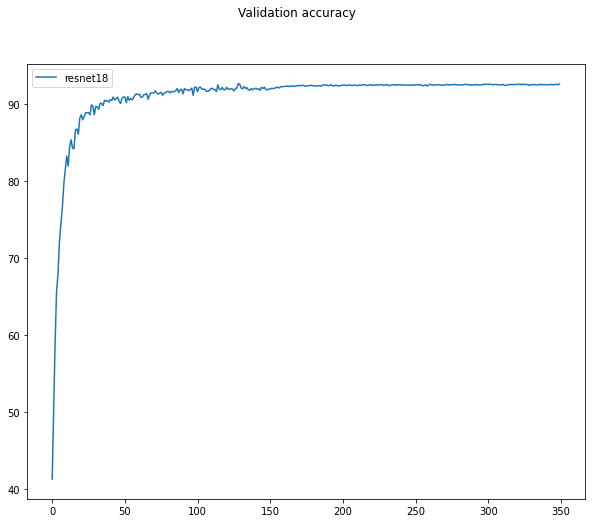


**** Ended Plotting multigraph ****



In [12]:
plot_multigraph(lst_plottingJobs_val_acc,lst_plottingLegends_val_acc,title="Validation accuracy")


**** Started Plotting multigraph ****



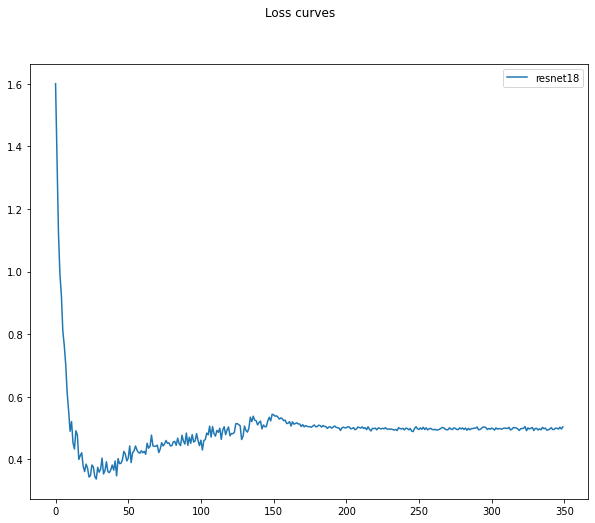


**** Ended Plotting multigraph ****



In [13]:
plot_multigraph(lst_plottingJobs_loss,lst_plottingLegends_loss,title="Loss curves")

In [18]:
display_classwise_accuracy(test_loader,device,model,classes)

/content/drive/My Drive/EVA5/Week8/models/networks/resnet.py:104: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Accuracy of plane : 95.23809523809524
Accuracy of car : 97.14285714285714
Accuracy of bird : 90.9090909090909
Accuracy of cat : 91.89189189189189
Accuracy of deer : 94.44444444444444
Accuracy of dog : 86.66666666666667
Accuracy of frog : 96.55172413793103
Accuracy of horse : 96.96969696969697
Accuracy of ship : 100.0
Accuracy of truck : 90.47619047619048
